In [1]:
import math
import sys
import glob
import pickle
import numpy as np
import scipy as sp
import suite2p as s2p
import os
from matplotlib import pyplot as plt
from matplotlib import gridspec
from matplotlib import axes as axes


import TwoPUtils

import sklearn
from sklearn.linear_model import LinearRegression as linreg

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [3]:
f = {'basedir': "/mnt/BigDisk/2P_scratch",
     'mouse': "GRABDA7",
     'date': "10_12_2020",
     'scene': "NeuroMods_LocationA",
     'session': 3,
     'scan_number': 1,
     'scanner': "NLW",
     'VR_only': False,
     'prompt_for_keys': False}

scan_str = "%s_%03d_%03d" % (f['scene'],f['session'],f['scan_number'])
try:
    source_folder  = os.path.join('/media/mplitt','Backup Plus')
    source_stem = os.path.join(source_folder,f['mouse'],f['date'],f['scene'],scan_str)
    info = TwoPUtils.scanner_tools.sbx_utils.loadmat(source_stem+'.mat')
except:
    source_folder  = os.path.join('/media/mplitt','Backup Plus1','2P_Data')
    source_stem = os.path.join(source_folder,f['mouse'],f['date'],f['scene'],scan_str)
    info = TwoPUtils.scanner_tools.sbx_utils.loadmat(source_stem+'.mat')

print(source_stem)
figdir = os.path.join("/home/mplitt/Fig_scratch/InVivoDA/",f['mouse'])
os.makedirs(figdir,exist_ok=True)


f['scan_file']=source_stem+'.sbx'
f['scanheader_file']=source_stem+'.mat'
f['vr_filename']= os.path.join("/home/mplitt/VR_scratch",f['mouse'],f['date'],"%s_%d.sqlite" %(f['scene'],f['session']))
if f['mouse'] == 'GRABDA6':
    f['s2p_path']=os.path.join("/home/mplitt/2P_scratch",f['mouse'],f['date'],f['scene'],scan_str,'suite2p')
else:
    f['s2p_path']=os.path.join("/mnt/BigDisk/2P_scratch",f['mouse'],f['date'],f['scene'],scan_str,'suite2p')

    #behavior data
sess = TwoPUtils.sess.Session(**f)
sess.load_scan_info()
sess.align_VR_to_2P()
sess.load_suite2p_data()
sess.add_timeseries(licks=sess.vr_data['lick'],rewards=sess.vr_data['reward'],speed=sess.vr_data['speed'])

/media/mplitt/Backup Plus/GRABDA7/10_12_2020/NeuroMods_LocationA/NeuroMods_LocationA_003_001


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/sess.py:256: UserWarning: Looking for coaligned suite2p sessions is not implemented yet
  warnings.warn("Looking for coaligned suite2p sessions is not implemented yet")
/home/mplitt/repos/TwoPUtils/preprocessing.py:134: RuntimeWarning: divide by zero encountered in remainder
  lines = np.array([l % scan_info['fold_lines'] for l in scan_info['line']])


1234.2718544719555 1234.2071753410814


/home/mplitt/repos/TwoPUtils/sess.py:390: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  v = v[np.newaxis, :]


Int64Index([  140,   467,   887,  1273,  1606,  1940,  2620,  3018,  3326,
             3725,  4018,  4283,  4536,  4819,  5055,  5285,  5522,  5819,
             6034,  6342,  6735,  7096,  7599,  7916,  8308,  8629,  8861,
             9119,  9525,  9810, 10065, 10364, 10644, 11013, 11238, 11521,
            11849, 12100, 12420, 12750, 13557, 13896, 14172, 14435, 14676,
            14951, 15216, 15514, 15805, 16094, 16413, 16689, 16918, 17187,
            17443, 17697, 18026, 18332, 18585, 18851],
           dtype='int64') Int64Index([  415,   747,  1091,  1525,  1848,  2526,  2930,  3292,  3567,
             3950,  4217,  4499,  4746,  4995,  5253,  5451,  5775,  5999,
             6289,  6665,  6973,  7292,  7861,  8163,  8553,  8808,  9045,
             9394,  9729,  9994, 10281, 10560, 10848, 11196, 11488, 11760,
            12061, 12334, 12686, 13432, 13819, 14132, 14353, 14608, 14886,
            15149, 15423, 15737, 16040, 16346, 16633, 16873, 17125, 17399,
            17617, 

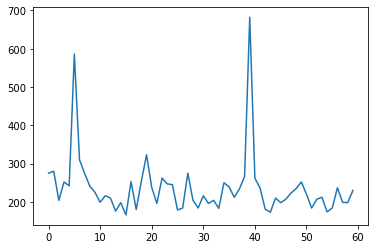

In [4]:
print(sess.trial_start_inds,sess.teleport_inds)
fig,ax = plt.subplots()
# ax.plot(sess.trial_start_inds)
ax.plot(sess.teleport_inds-sess.trial_start_inds)

60


/home/mplitt/anaconda3/envs/InVivoDA/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()


Text(0.5, 1.0, 'licks')

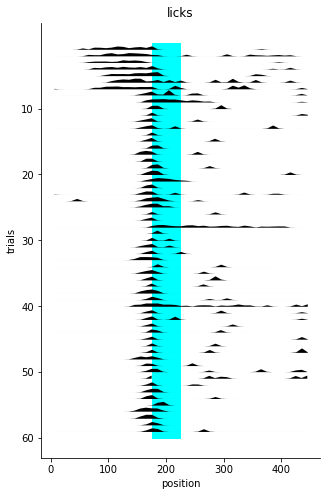

In [6]:
# plot licking behavior
if f['scene']=='SingleMorph' or f['scene']=='NeuroMods_LocationA':
    reward_zone = [175,225]
elif f['scene']=='NeuroMods_LocationB':
    reward_zone = [390,440]
    
    
sess.add_pos_binned_trial_matrix(['licks','rewards'],'pos')
fig, ax = plt.subplots(figsize=[5,8])

rewards = 1.*(sess.trial_matrices['rewards'][0].sum(axis=-1)>0)
ntrials = sess.trial_matrices['licks'][0].shape[0]
print(ntrials)

# for i in range(0,ntrials,20):
    
#     ax.fill_betweenx([ntrials-i,ntrials-i-10],175, 225,alpha=.3,color='cyan')
#     ax.fill_betweenx([ntrials-i-10,ntrials-i-20],325,375,alpha=.3,color='magenta')

#normalize speed to the max of all trials
norm_licks = sess.trial_matrices['licks'][0]/np.nanmax(sess.trial_matrices['licks'][0].ravel()) 
ax.fill_betweenx([0,ntrials],reward_zone[0],reward_zone[1],color='cyan') #plot reward zone
TwoPUtils.utilities.smooth_raster(sess.trial_matrices['licks'][-1],norm_licks,ax=ax, smooth=True,sig=0.5) #norm_licks
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('position')
ax.set_ylabel('trials')
ax.set_title('licks')
#fig.savefig(os.path.join(figdir,"%s_%s_licks.pdf" % (f['date'],f['scene'])))

60


/home/mplitt/anaconda3/envs/InVivoDA/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


Text(0.5, 1.0, 'speed')

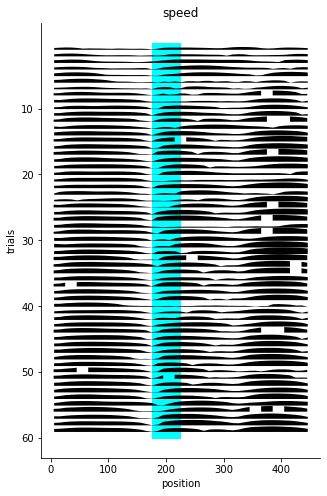

In [7]:
# plot running behavior

sess.add_pos_binned_trial_matrix(['speed'],'pos')
fig, ax = plt.subplots(figsize=[5,8])


rewards = 1.*(sess.trial_matrices['rewards'][0].sum(axis=-1)>0)
ntrials = sess.trial_matrices['speed'][0].shape[0]
print(ntrials)

# for i in range(0,ntrials,20):
    
#     ax.fill_betweenx([ntrials-i,ntrials-i-10],175, 225,alpha=.3,color='cyan')
#     ax.fill_betweenx([ntrials-i-10,ntrials-i-20],325,375,alpha=.3,color='magenta')

#normalize speed to the max of all trials
norm_speed = sess.trial_matrices['speed'][0]/np.nanmax(sess.trial_matrices['speed'][0].ravel())
ax.fill_betweenx([0,ntrials],reward_zone[0],reward_zone[1],color='cyan') #plot reward zone
TwoPUtils.utilities.smooth_raster(sess.trial_matrices['speed'][-1],norm_speed,ax=ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('position')
ax.set_ylabel('trials')
ax.set_title('speed')

#fig.savefig(os.path.join(figdir,"%s_%s_speed.pdf" % (f['date'],f['scene'])))


In [8]:

# green channel bleedthrough correction: regress green channel from red channel
F = np.zeros(sess.timeseries['F'].shape)*np.nan #red
F2 = np.zeros(sess.timeseries['F'].shape)*np.nan #green

#keep only the fluorescence on each trial
Fneu = np.zeros(sess.timeseries['F'].shape)*np.nan
Fneu2 = np.zeros(sess.timeseries['F'].shape)*np.nan
for i, (start,stop) in enumerate(zip(sess.trial_start_inds.tolist(),sess.teleport_inds.tolist())):
    F[:,start-1:stop-1] = sess.timeseries['F'][:,start-1:stop-1]
    F2[:,start-1:stop-1] = sess.timeseries['F_chan2'][:,start-1:stop-1]
    
    Fneu[:,start-1:stop-1] = sess.timeseries['Fneu'][:,start-1:stop-1]
    Fneu2[:,start-1:stop-1] = sess.timeseries['Fneu_chan2'][:,start-1:stop-1]

# For each cell, predict red from green channel, subtract prediction to get residual, and add back in intercept;
# So red signal will be residual+intercept
nanmask = ~np.isnan(F[0,:])
print(nanmask.sum())
for cell in range(F.shape[0]):
    lr = linreg().fit(F2[cell:cell+1,nanmask].T,F[cell,nanmask]) #linear regression from scikitlearn
    F[cell,nanmask] = F[cell,nanmask]-lr.predict(F2[cell:cell+1,nanmask].T) + lr.intercept_
    
    lr = linreg().fit(Fneu2[cell:cell+1,nanmask].T,Fneu[cell,nanmask])
    Fneu[cell,nanmask] = Fneu[cell,nanmask]-lr.predict(Fneu2[cell:cell+1,nanmask].T) + lr.intercept_

    # once bleedthrough is subtracted, subtract neuropil from both channels
F -= .7*Fneu
F2 -= .7*Fneu2
    

# Caluclate baseline
Flow = sp.ndimage.filters.gaussian_filter(F[:,nanmask],    [0., 15]) #cut out ITIs and smooth signal
Flow = sp.ndimage.filters.minimum_filter1d(Flow,    int(500*15)) #minimum filter, taking min val over 15 sec
Flow = sp.ndimage.filters.maximum_filter1d(Flow,    int(500*15)) #max filter with same window (dilation)
# red dff
dFF = np.zeros(sess.timeseries['F'].shape)*np.nan 
dFF[:,nanmask] = (F[:,nanmask]-Flow)/np.abs(Flow) #to get deltaF/F: subtract baseline from initial signal, divide by abs(baseline)
# baseline can sometimes end up as negative due to regression

#deltaF/F for chan 2
Flow = sp.ndimage.filters.gaussian_filter(F2[:,nanmask],    [0., 15])
Flow = sp.ndimage.filters.minimum_filter1d(Flow,    int(500*15))
Flow = sp.ndimage.filters.maximum_filter1d(Flow,    int(500*15))
# green dff
dFF2 = np.zeros(sess.timeseries['F'].shape)*np.nan
dFF2[:,nanmask] = (F2[:,nanmask]-Flow)/np.abs(Flow)

# Smooth the deltaF/F transients by 2 time bins
for i, (start,stop) in enumerate(zip(sess.trial_start_inds.tolist(),sess.teleport_inds.tolist())):
    dFF[:,start-1:stop-1] = sp.ndimage.filters.gaussian_filter1d(dFF[:,start-1:stop-1],2,axis=1)
    dFF2[:,start-1:stop-1] = sp.ndimage.filters.gaussian_filter1d(dFF2[:,start-1:stop-1],2,axis=1)

    # add deltaF/F timeseries to session object
sess.add_timeseries(dff=dFF, dff2=dFF2) 
sess.add_pos_binned_trial_matrix(['dff','dff2'],'pos')

# for cell in range(0,dFF.shape[0],50):
#     fig,ax = plt.subplots(figsize=[15,3])
#     ax.plot(dFF[cell,:5000])
#     ax.plot(dFF2[cell,:5000])

14183


/home/mplitt/repos/TwoPUtils/spatial_analyses.py:63: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


In [9]:
#calculate place cells
#win_trial_perm = whether to permute within trials
masks,SI,p = TwoPUtils.spatial_analyses.place_cells_calc(dFF.T, sess.vr_data['pos'],  sess.trial_start_inds,
                sess.teleport_inds,pthr = .05,speed=None,win_trial_perm=True, bootstrap = True,nperms = 100)


/home/mplitt/repos/TwoPUtils/spatial_analyses.py:63: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)
/home/mplitt/repos/TwoPUtils/spatial_analyses.py:63: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


perm 0


/home/mplitt/repos/TwoPUtils/spatial_analyses.py:63: RuntimeWarning: Mean of empty slice
  trial_mat[trial, b] = np.nanmean(arr_t[(pos_t > edge1) & (pos_t <= edge2), :], axis=0)


(392, 45) (392,)


(392.0, -0.5)

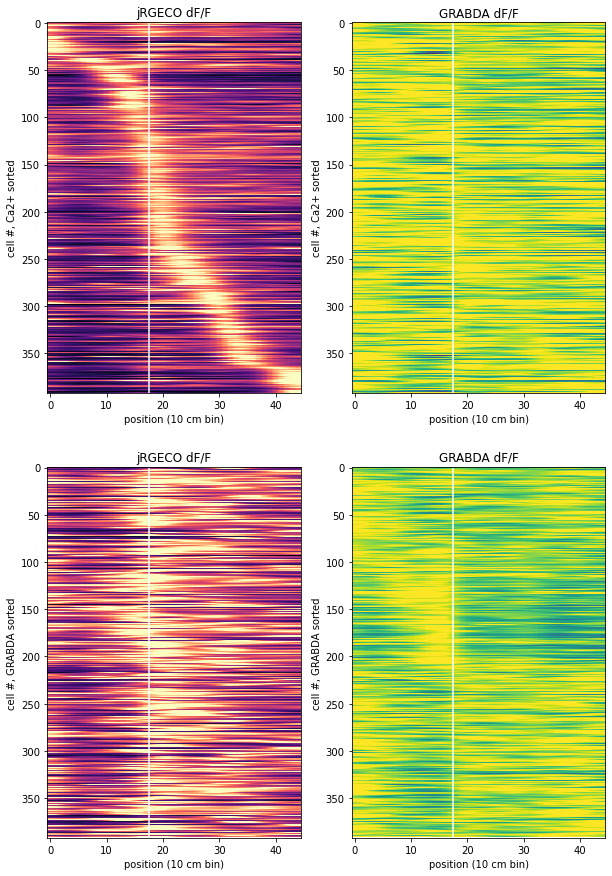

In [10]:
# print(masks.sum())
sort_FR, sort = TwoPUtils.spatial_analyses.placecell_sort(sess.trial_matrices['dff'][0],masks)

print(sort_FR.shape,sort.shape)
fig,ax = plt.subplots(2,2,figsize=[10,15])
jrsort = ax[0,0].imshow(sort_FR,cmap='magma',aspect='auto',vmax=.8)
ax[0,0].vlines(reward_zone[0]/10,0,sort_FR.shape[0],colors='white')
ax[0,0].set_ylabel('cell #, Ca2+ sorted')
ax[0,0].set_xlabel('position (10 cm bin)')
ax[0,0].set_title('jRGECO dF/F')
axes.Axes.set_ylim(ax[0,0],bottom=sort_FR.shape[0])
#fig.colorbar(jrsort,ax=ax[0,0],panchor=(0.5, 0.0))


dff2_toplot = np.nanmean(sess.trial_matrices['dff2'][0][:,:,masks],axis=0)[:,sort].T
dff2_toplot = sp.ndimage.filters.gaussian_filter1d(dff2_toplot/np.amax(dff2_toplot,axis=1,keepdims=True),2,axis=1)
ax[0,1].imshow(dff2_toplot,cmap='viridis',aspect='auto',vmax=.8)
ax[0,1].vlines(reward_zone[0]/10,0,sort_FR.shape[0],colors='white')
ax[0,1].set_ylabel('cell #, Ca2+ sorted')
ax[0,1].set_xlabel('position (10 cm bin)')
ax[0,1].set_title('GRABDA dF/F')
axes.Axes.set_ylim(ax[0,1],bottom=dff2_toplot.shape[0])

sort_dFF2, sort2 = TwoPUtils.spatial_analyses.placecell_sort(sess.trial_matrices['dff2'][0],masks)
ax[1,1].imshow(sort_dFF2,cmap='viridis',aspect='auto',vmax=.8)
ax[1,1].vlines(reward_zone[0]/10,0,sort_FR.shape[0],colors='white')
ax[1,1].set_ylabel('cell #, GRABDA sorted')
ax[1,1].set_xlabel('position (10 cm bin)')
ax[1,1].set_title('GRABDA dF/F')
axes.Axes.set_ylim(ax[1,1],bottom=sort_dFF2.shape[0])


dff_toplot = np.nanmean(sess.trial_matrices['dff'][0][:,:,masks],axis=0)[:,sort2].T
dff_toplot = sp.ndimage.filters.gaussian_filter1d(dff_toplot/np.amax(dff_toplot,axis=1,keepdims=True),2,axis=1)
ax[1,0].imshow(dff_toplot/np.amax(dff_toplot,axis=1,keepdims=True),cmap='magma',aspect='auto',vmax=.8)
ax[1,0].vlines(reward_zone[0]/10,0,sort_FR.shape[0],colors='white')
ax[1,0].set_ylabel('cell #, GRABDA sorted')
ax[1,0].set_xlabel('position (10 cm bin)')
ax[1,0].set_title('jRGECO dF/F')
axes.Axes.set_ylim(ax[1,0],bottom=dff_toplot.shape[0])